##### Copyright 2018 The TensorFlow Authors.

# Entrenando una red neuronal: clasificación básica

Este notebook entrena un modelo de red neuronal para clasificar imagenes de ropa, como zapatos y camisas.

Usando [tf.keras](https://www.tensorflow.org/guide/keras), una API de alto nivel para construir y entrenar modelos en TensorFlow.

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.5.0


## Importar el dataset _"Fashion MNIST"_

Usando el dataset [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist) (Modified National Institute of Standards and Technology) que contiene 70,000 imagenes en escala de grises con 10 categorias. Que se ve así:

<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1.</b> <a href="https://github.com/zalandoresearch/fashion-mnist">Fashion-MNIST samples</a> (by Zalando, MIT License).<br/>&nbsp;
  </td></tr>
</table>

De las imágenes se usarán 60,000 para entrenar la red y 10,000 para evaluar que tan acertadamente se aprendió a clasificar los objetos. Es posible acceder al dataset directamente desde TensorFlow:

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

Al cargar el dataset retorna 4 arreglos de NumPy:


* Los arreglos `train_images` y `train_labels` son el *conjunto de entrenamiento* que usará el modelo para aprender.
* El modelo se prueba contra el *conjunto de prueba*, compuesto por los arreglos `test_images`, y `test_labels`.

las imágenes son arreglos de NumPy de 28x28 con valores por pixel entre 0 y 255. Las etiquetas son un arreglo de enteros, entre 0 y 9, correspondientes a la *clase* de ropa que la imágen representa:

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

Cada imágen es mapeada a una etiqueta. Ya que no estan incluidas en el dataset, se almacenarán acá para usarlas luego:

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

n_class = len(class_names)
print(n_class)

10


## Explorar los datos

A continuación se evidencia lo que se mencionó antes. Son 60,000 imágenes de entrenamiento, cada imagen de 28x28 pixeles:


In [ ]:
train_images.shape

(60000, 28, 28)

Igualmente, hay 60,000 Etiquetas en el set de entrenamiento:

In [ ]:
len(train_labels)

60000

Cada etiqueta es un entero entre 0 y 9:

In [ ]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

Hay 10,000 imagenes en el set de prueba con su correspondiente etiqueta. Cada imagen con un tamaño de 28x28 pixeles:

In [ ]:
print(test_images.shape)
print(len(test_labels))

(10000, 28, 28)
10000


## Preprocesamiento de los datos

Los datos deben ser preprocesados antes de poder ingresarlos al modelo para entrenar la red. Si se inspecciona la primera imagen del set de entrenamiento se puede observar que los valores de los píxeles varían en el rango de 0 a 255 (intensidad luminosa en escala de grises):

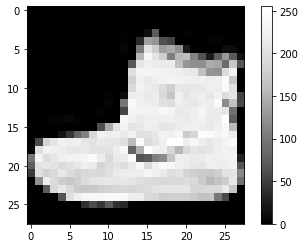

In [ ]:
plt.figure()
plt.imshow(train_images[0], cmap='Greys_r')
plt.colorbar()
plt.grid(False)
plt.show()

Se estandarizan los valores de los píxeles para que estén en el rango [0, 1] dividiendolos entre 255, en general es mejor trabajar con valores de entrada pequeños. Se debe hacer tanto para el set de prueba como para el de entrenamiento:

In [ ]:
train_images = train_images / 255.0
test_images = test_images / 255.0

Las primeras 25 imagenes del set de entrenamiento con el nombre de la clase debajo de cada una. Se debe verificar que los datos estan en formato correcto y listo para construir y entrenar la red.


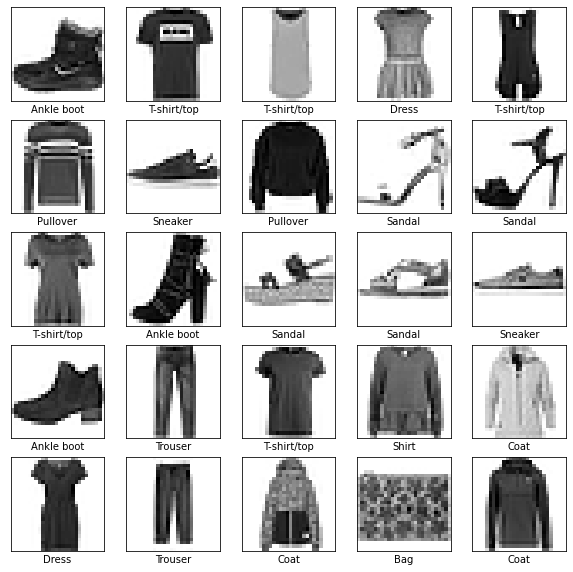

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
train_labels.shape

(60000,)

## Construcción del modelo

Modelo secuencial de Keras: https://keras.io/guides/sequential_model/

Se requiere configurar las capas del modelo, luego compilarlo.

### Configuración de capas

Las capas extraen representaciones de los datos que reciben. Tratando siempre de tomar la información mas representativa para el problema a tratar.

La mayoría del _deep learning_ consiste en encadenar juntas capas simples. La mayoría de las capas, como `tf.keras.layers.Dense`, tienen parametros que se aprenden durante el entrenamiento.

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(n_class, activation=tf.nn.softmax)
])

La primera capa de la red, `tf.keras.layers.Flatten`, transforma el formato de las imagenes de 2D (28x28) a 1D (784). Esta capa no tiene parametros que aprender, solo formatea los datos.

Luego de que las imagenes han sido aplanadas, la red tiene 2 capas de `tf.keras.layers.Dense`. Estas capas estan completamente conectadas. La primera capa `Densa` tiene 128 nodos (o neuronas). La segunda capa tiene 10 nodos *softmax* retornando un arreglo de 10 puntajes de probabilidad que suman 1. Cada nodo contiene un puntaje que indica la probabilidad de que la imagen pertenezca a una de las 10 clases.


### Compila el modelo

Antes de que el modelo este listo para entrenar, se necesitan unas cuantas configuraciones adicionales. Estas se añaden durante el paso de *compilación*:

* *Optimizer* —Forma en la que el modelo se actualiza basado en la información que se tiene y la función de pérdida (*loss*).
* *Función loss* —Mide la precisión del modelo durante en entrenamiento. Se minimiza esta funcion para "llevar" el modelo en la dirección correcta.
* *Metrics* —Se usa para monitorear el entrenamiento y los pasos de testeo. En el ejemplo se usa *accuracy*, la proporción de imagenes que estan correctamente clasificadas.

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


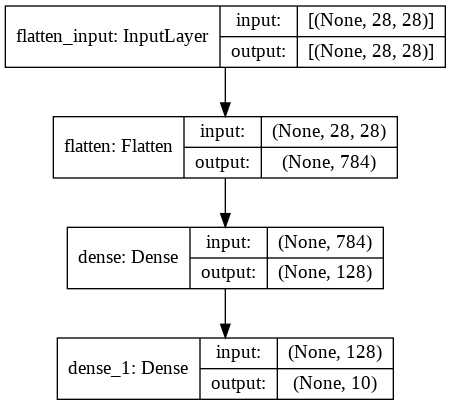

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)

## Entrenar el modelo

Entrenar una red neuronal requiere los siguientes pasos:

1. Alimentarla con la información de entrenamiento. Los arreglos `train_images` y `train_labels`.
2. Que el modelo aprenda a asociar las imagenes y las etiquetas.
3. Pedirle al modelo que haga predicciones sobre el conjunto de prueba. El arreglo de `test_images` y verificar que la predicción concuerde con la etiqueta en el arreglo de prueba `test_labels`.

Para iniciar el entrenemiento se llama al metodo `model.fit` y se ajustan los datos que se tienen:

In [ ]:
history = model.fit(train_images,train_labels,
                    validation_data=(test_images, test_labels),
                    epochs=7)

Epoch 1/7
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5009 - accuracy: 0.8251 - val_loss: 0.4559 - val_accuracy: 0.8363
Epoch 2/7
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3742 - accuracy: 0.8651 - val_loss: 0.3941 - val_accuracy: 0.8623
Epoch 3/7
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3380 - accuracy: 0.8769 - val_loss: 0.3713 - val_accuracy: 0.8688
Epoch 4/7
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3135 - accuracy: 0.8846 - val_loss: 0.3514 - val_accuracy: 0.8735
Epoch 5/7
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2960 - accuracy: 0.8903 - val_loss: 0.3666 - val_accuracy: 0.8670
Epoch 6/7
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2791 - accuracy: 0.8973 - val_loss: 0.3668 - val_accuracy: 0.8699
Epoch 7/7
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2681 - accuracy: 0.9002 - val_loss: 0.3612 - val_accuracy: 0.8704

Mientras el modelo entrena, la función de pérdida y el *accuracy* se van mostrando. EL modelo alcanza una precisión de cerca del 90% en entrenamiento y del 88% en validación.

In [ ]:
history_dict = history.history
print(history_dict.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


### Grafico de exactitud

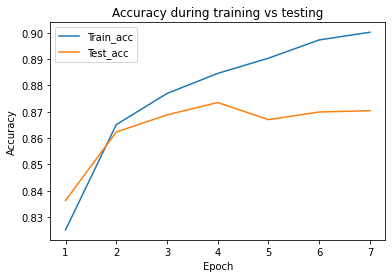

In [ ]:
epochs = range(1, len(history_dict["accuracy"]) + 1)

plt.plot(epochs, history_dict["accuracy"])
plt.plot(epochs, history_dict["val_accuracy"])
plt.legend(["Train_acc", "Test_acc"])
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy during training vs testing")
plt.show()

### Gráfico de la función de pérdida

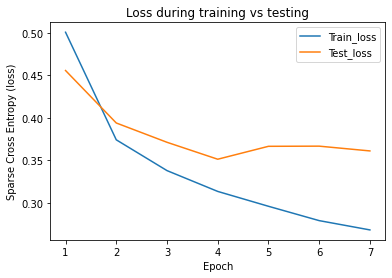

In [ ]:
plt.plot(epochs, history_dict["loss"])
plt.plot(epochs, history_dict["val_loss"])
plt.legend(["Train_loss", "Test_loss"])
plt.xlabel("Epoch")
plt.ylabel("Sparse Cross Entropy (loss)")
plt.title("Loss during training vs testing")
plt.show()

## Realizar predicciones

Con el modelo entrenado, es posible usarlo para realizar predicciones con algunas imagenes.

*Es importante tener en cuenta que antes de hacer predicciones, a los nuevos datos se les debe aplicar el mismo preprocesamiento por el que pasaron los datos de entrenamiento*


In [ ]:
predictions = model.predict(test_images)

### Matriz de Confusión

In [ ]:
type(train_labels)

numpy.ndarray

Confusion Matrix


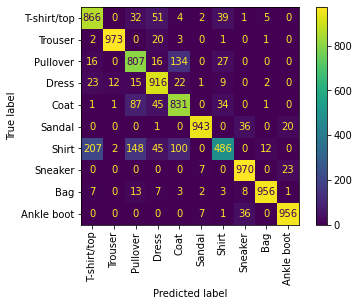

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
y_pred = np.argmax(predictions, axis=1)
print('Confusion Matrix')
cm = confusion_matrix(test_labels, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=class_names)
disp.plot(xticks_rotation='vertical', values_format='d')

### Predicciones individuales

Con esto el modelo predice una etiqueta para cada imagen en el dataset de entrenamiento.

In [ ]:
TEST_IMAGES_INDEX = 0

In [ ]:
predictions[TEST_IMAGES_INDEX]

array([1.5752421e-06, 2.8502436e-08, 2.2207767e-07, 6.2090336e-08,
       6.1218168e-07, 1.6381723e-04, 3.0700340e-07, 1.6472744e-02,
       5.9624739e-08, 9.8336053e-01], dtype=float32)

La predicción es un arreglo de 10 posiciones. Describen la *probabilidad* que el modelo le asigna a la imagen de pertener a esa clase o etiqueta.


In [ ]:
clase = np.argmax(predictions[TEST_IMAGES_INDEX])
print('Etiqueta predicha: ', clase)
print('Corresponde a: ', class_names[clase])

Etiqueta predicha:  9
Corresponde a:  Ankle boot


Entonces el modelo dice que probablemente la imagen pertenece a *'ankle boot'*, que es la clase 9. Esto se puede verificar viendo a que etiqueta corresponde esta posicion en el arreglo de prueba.


In [ ]:
print('Etiqueta real: ', test_labels[TEST_IMAGES_INDEX])

Etiqueta real:  9


Es posible graficarlo para ver la totalidad de las 10 predicciones de etiqueta.

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)
  
  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)
  
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

Mirando la primera imagen, las predicciones y el resultado, podemos ver qué prenda es la que se esta clasificando y su probabilidad de pertenencia a cada una de las clases.

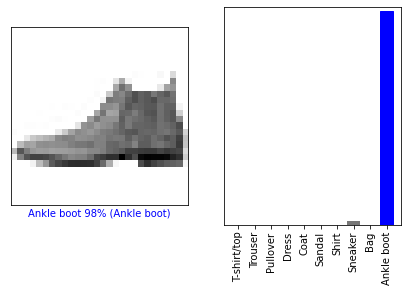

In [ ]:
i = 0
plt.figure(figsize=(7,4))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.xticks(range(10), class_names, rotation=90)
plt.show()

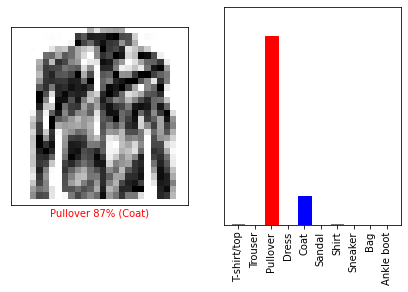

In [ ]:
i = 17
plt.figure(figsize=(7,4))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.xticks(range(10), class_names, rotation=90)
plt.show()

A continuación se pueden graficar varias imagenes con sus respectivas predicciones. Las correctas estan etiquetadas con azul y las malas con rojo. Hay que tener en cuenta que aunqeu la probabilidad de pertenecia a un grupo sea muy alta no implica que no este equivocada

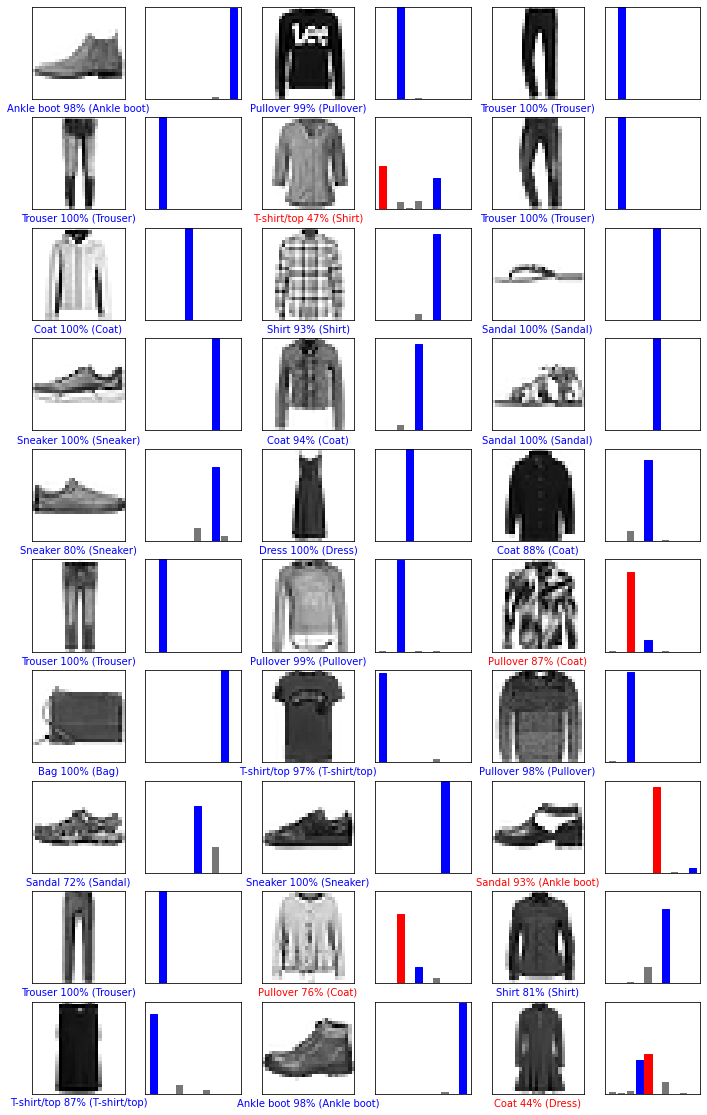

In [ ]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 10
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.show()

Finalmente, se usa el modelo para hacer predicciones de una sola imagen

In [ ]:
# Grab an image from the test dataset
img = test_images[17]

print(img.shape)

(28, 28)


Los modelos de `tf.keras` son optimizados para hacer predicciones en lotes de datos, por lo que, aunque es una única imagen, se debe añadir a un *batch*:

In [ ]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img, 0))

# (batch_size, dim_1, dim_2, ..., channels)
# default: channels_last
print(img.shape)

(1, 28, 28)


Ahora se puede hacer la predicción:

In [ ]:
predictions_single = model.predict(img)

print(predictions_single)

[[1.0570163e-03 1.4167675e-05 8.6614722e-01 3.1263610e-06 1.3063079e-01
  8.4050261e-10 2.0976202e-03 1.7847468e-07 4.9936887e-05 5.3245994e-08]]


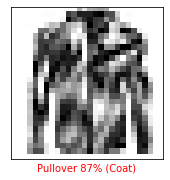

In [ ]:
i = 17
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.show()

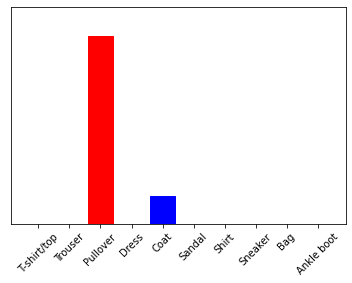

In [ ]:
i = 17
plot_value_array(i, predictions_single[0], test_labels)
plt.xticks(range(10), class_names, rotation=45)
plt.show()

`model.predict` retorna una lista de listas, una por cada imagen en la colección de datos. Para obtener la etiqueta, como se vió antes, obtenemos el índice con la probabilidad mas alta:

In [ ]:
prediction_result = np.argmax(predictions_single[0])
print('Etiqueta predicha: ', prediction_result)
print('Corresponde a: ', class_names[prediction_result])

Etiqueta predicha:  2
Corresponde a:  Pullover


Y el modelo predice una etiqueta de 4, correspondiente a `coat`.
